In [28]:
import pandas as pd
import sys
import time
sys.path.insert(0,"/usr/lib/chromium-browser/chromedriver")
#importamos las librerias que vamos a utilizar y asignamos la ruta para luego utilizar el chromedriver

In [29]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

service = Service("./data/chromedriver-win64/chromedriver.exe")
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)

url = "https://www.15bodegas.com/"          
driver.get(url)
#importamos las librerias de selenium que vamos a utilizar, asignamos variables a la ruta del chromedriver, la varibale para las opciones del chrome, 
#la variable que junta las dos dentro de una para mejor configuracion y una vez teniendo todo eso ejecutamos la funcion driver.get(url) para que 
#cargar la pag web desde el chromedriver

In [30]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
element = driver.find_element(By.ID, "onetrust-reject-all-handler")
element.send_keys(Keys.ENTER)
#seleccionamos que no queremos aceptar las cookies y le damos a enter

In [31]:
element = driver.find_element(By.ID, "search")
#importamos la libreria de selenium para buscar el id que se identifica como el buscador de la pag web

In [32]:
element.send_keys("vino tinto")   
#importamos la libreria respectiva para poner en el buscador "vino tinto" para poder hacer la busqueda

In [33]:
time.sleep(3)
element.send_keys(Keys.ENTER)
#buscamos lo que hemos puesto antes en el buscador con un tiempo de 3 segundos

In [34]:
elements = driver.find_elements(By.CLASS_NAME, "product-item-info")
#asignamos a una variable las clases de cada vino tinto 

In [35]:
len(elements) 
#imprimimos el numero de elementos que contienen la clase anteriormente extraida del html de la pagina

12

In [36]:
elements 
#imprimimos los elementos

[<selenium.webdriver.remote.webelement.WebElement (session="097fa8aba731db8789a3cfe6991ed408", element="f.A0B60B52CDC7C43097360BFBD61DF40E.d.62456BB9359AEC851E2AB73ADA53BDE5.e.204")>,
 <selenium.webdriver.remote.webelement.WebElement (session="097fa8aba731db8789a3cfe6991ed408", element="f.A0B60B52CDC7C43097360BFBD61DF40E.d.62456BB9359AEC851E2AB73ADA53BDE5.e.207")>,
 <selenium.webdriver.remote.webelement.WebElement (session="097fa8aba731db8789a3cfe6991ed408", element="f.A0B60B52CDC7C43097360BFBD61DF40E.d.62456BB9359AEC851E2AB73ADA53BDE5.e.211")>,
 <selenium.webdriver.remote.webelement.WebElement (session="097fa8aba731db8789a3cfe6991ed408", element="f.A0B60B52CDC7C43097360BFBD61DF40E.d.62456BB9359AEC851E2AB73ADA53BDE5.e.213")>,
 <selenium.webdriver.remote.webelement.WebElement (session="097fa8aba731db8789a3cfe6991ed408", element="f.A0B60B52CDC7C43097360BFBD61DF40E.d.62456BB9359AEC851E2AB73ADA53BDE5.e.338")>,
 <selenium.webdriver.remote.webelement.WebElement (session="097fa8aba731db8789a3

In [37]:
product_name = []
product_price_for_bottle = []
product_total_reviews = []
product_link = [] 
product_sel = []
#creamos una lista por cada dato de cada objeto que queremos extraer

In [38]:
from selenium.common.exceptions import NoSuchElementException

for item in elements:

    
    # Extraer el nombre de cada producto
    try:
        name = item.find_element(By.CLASS_NAME, "product-item-name").text.strip()
    except NoSuchElementException:
        name = "NA"
    product_name.append(name)
    if name not in product_name:  
        product_name.append(name)
    #extraemos el nombre de cada producto mediante la funcion find_element usando la clase global de cada producto, 
    #si no hay datos se inserta un NA y luego introducimos esos datos dentro de la lista respectiva, 
    #por ultimo comprovamos a ver si hay datos repetidos y si los hay no se insertan.

    
    # Extraer el link de cada producto
    try:
        link = item.find_element(By.CLASS_NAME, "product-item-link").get_attribute("href")
    except NoSuchElementException:
        link = "NA"
    product_link.append(link)
    if link not in product_link:  
        product_link.append(link)
    #extraemos el link de cada producto mediante la funcion find_element usando la clase global de cada producto junto con el atributo "href", 
    #si no hay datos se inserta un NA y luego introducimos esos datos dentro de la lista respectiva, 
    #por ultimo comprovamos a ver si hay datos repetidos y si los hay no se insertan.

    
    # Extraer todos los elementos de precio de una sola vez
    try:
        price_elements = item.find_elements(By.XPATH, './/span[@class="price final-price"]')
    
        for price_element in price_elements:
            price = price_element.text.strip().replace("\xa0", "").replace("€", "").replace(" ", "") 
            if price and price not in product_price_for_bottle:  
                product_price_for_bottle.append(price)

    except NoSuchElementException:
        pass
    #extraemos el precio de cada producto mediante la funcion find_element usando el xpath del precio, hacemos un bucle for que seleccione 
    #todos los datos precios y limpiamos el numero propio del precio con la funcion replace y luego lo insertamos dentro de la lista.

    
    # Extraer el número de reseñas de cada producto
    try:
        reviews = item.find_element(By.CLASS_NAME, "total_reviews").text.strip()
        reviews = reviews.replace("(", "").replace(")", "")
        reviews = reviews.replace(" Reviews", "").replace(" Review", "").strip()
    except NoSuchElementException:
        reviews = "NA"
    product_total_reviews.append(reviews)
    if reviews not in product_total_reviews:  
        product_total_reviews.append(reviews)
    #extraemos el numero de reseñas de cada producto mediante la funcion find_element usando la clase global de cada producto, quitamos el parentesis 
    #y la palabra reviews con la funcion replace y si no hay datos se inserta un NA y luego introducimos esos datos dentro de 
    #la lista respectiva, por ultimo comprovamos a ver si hay datos repetidos y si los hay no se insertan.

    
    # Extraer el id de cada producto
    try:
        data_sel = item.find_element(By.XPATH, ".//div[@data-product-selected]").get_attribute("data-product-selected")
    except NoSuchElementException:
        reviews = "NA"
    product_sel.append(data_sel)
    if data_sel not in product_sel:  
        product_sel.append(data_sel)
    #extraemos el id de cada producto mediante la funcion find_element usando el xpath de cada id junto con su respectivo get_attribute
    #si no hay datos se inserta un NA y luego introducimos esos datos dentro de la lista respectiva, por ultimo comprovamos a ver si hay datos
    #repetidos y si los hay no se insertan.


print(product_name)
print(product_price_for_bottle)
print(product_sel)
print(product_total_reviews)
print(product_link)

#imprimimos los datos extraidos para comprobar que se han extraido correctamente.

['Bach Viña Extrísima Tinto (Outlet)\n37,5 cl', 'Bach Viña Extrísima Red 2022\n75 cl', 'Nuviana Tinto 2022\n75 cl', 'Vol i Dol Tinto 2022\n75 cl', 'Intramurs de Poblet Tinto 2021\n75 cl', "Vol d'Ànima de Raimat Tinto Ecológico 2021\n75 cl", 'Lata Bach Tinto\n25 cl', 'Abadia de Poblet Tinto 2019\n75 cl', 'Claustre Sant Sebastià dels Gorgs Tinto 2021\n75 cl', 'Silvae Tinto 2021\n75 cl', 'Raimat Clamor Tinto Eco\n75 cl', 'Veranza Tinto Rosca\n75 cl']
['4,21', '23,99', '3,95', '22,52', '5,95', '33,92', '8,95', '51,02', '9,75', '55,58', '2,75', '20,95', '119,42', '19,00', '108,30', '5,45', '6,45', '36,77', '3,59', '20,46']
['13561', '1053', '1662', '1854', '1083', '4471', '17666', '17306', '28586', '16694', '40599', '113475']
['', '16', '19', '7', '15', '14', '', '9', '1', '', '9', '3']
['https://www.15bodegas.com/bach-vina-extrisima-tinto-1', 'https://www.15bodegas.com/bach-vina-extrisima-tinto', 'https://www.15bodegas.com/nuviana-tinto', 'https://www.15bodegas.com/vol-i-dol-tinto', 'https

In [39]:
df = pd.DataFrame(zip(product_name, product_price_for_bottle, product_total_reviews, product_sel, product_link), columns=["Nombre, Año y formato","Precio por botella","Reviews totales","ID", "Link"])
df.fillna("NA", inplace=True)
df["Reviews totales"] = pd.to_numeric(df["Reviews totales"], errors="coerce").fillna(0)
df_sorted = df.sort_values(by="Reviews totales", ascending=False)
df_sorted

#creamos un data frame con cada objeto extraido, convertimos los valores vacios en NA, comvertimos la columna reviews a numerico y lo ordenamos
#de mayor a menor.

,"Nombre, Año y formato",Precio por botella,Reviews totales,ID,Link
2,Nuviana Tinto 2022\n75 cl,"3,95",19.0,1662,https://www.15bodegas.com/nuviana-tinto
1,Bach Viña Extrísima Red 2022\n75 cl,"23,99",16.0,1053,https://www.15bodegas.com/bach-vina-extrisima-...
4,Intramurs de Poblet Tinto 2021\n75 cl,"5,95",15.0,1083,https://www.15bodegas.com/intramurs-de-poblet-...
5,Vol d'Ànima de Raimat Tinto Ecológico 2021\n75 cl,"33,92",14.0,4471,https://www.15bodegas.com/vol-d-anima-de-raima...
7,Abadia de Poblet Tinto 2019\n75 cl,"51,02",9.0,17306,https://www.15bodegas.com/abadia-de-poblet-tinto
10,Raimat Clamor Tinto Eco\n75 cl,"2,75",9.0,40599,https://www.15bodegas.com/raimat-clamor-tinto-eco
3,Vol i Dol Tinto 2022\n75 cl,"22,52",7.0,1854,https://www.15bodegas.com/vol-i-dol-tinto
11,Veranza Tinto Rosca\n75 cl,"20,95",3.0,113475,https://www.15bodegas.com/veranza-tinto-rosca
8,Claustre Sant Sebastià dels Gorgs Tinto 2021\n...,"9,75",1.0,28586,https://www.15bodegas.com/claustre-sant-sebast...
0,"Bach Viña Extrísima Tinto (Outlet)\n37,5 cl","4,21",0.0,13561,https://www.15bodegas.com/bach-vina-extrisima-...


In [40]:
df_sorted.to_csv("productos.csv", index=False)
#convertimos el data frame a un csv como pide el enunciado

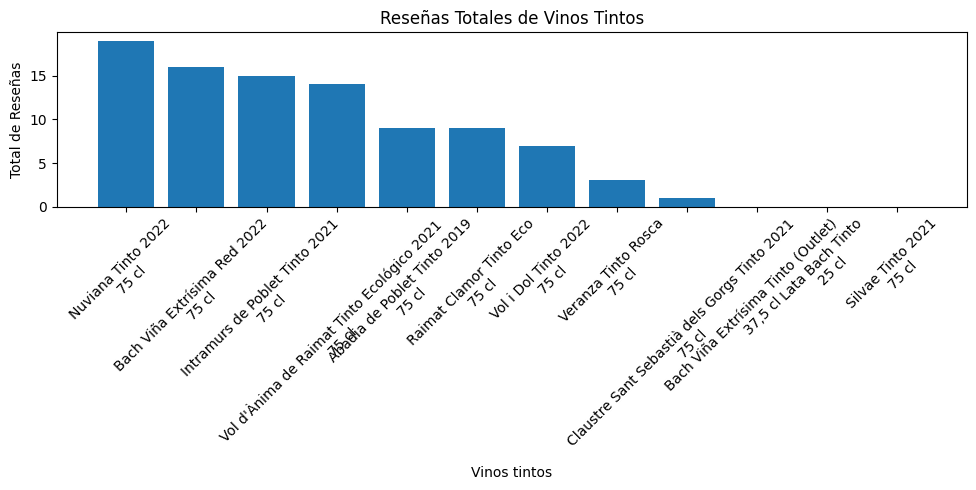

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_sorted["Nombre, Año y formato"], df_sorted["Reviews totales"])
plt.xlabel("Vinos tintos")
plt.ylabel("Total de Reseñas")
plt.title("Reseñas Totales de Vinos Tintos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#creamos el cuadro de mando para poder observar mejor las variables sobre otras variables
#las partes vacias son las variables que no tienen reseñas.

In [42]:
driver.quit()
#cerramos el chromedriver.